In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = False #음수표시

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# dir_file = pwd
df_ttf = pd.read_csv('01_M02_DC_train_ttf.csv')
df_train = pd.read_csv('01_M02_DC_train.csv')
df_fault = pd.read_csv('01_M02_train_fault_data.csv')

In [3]:
df_c2 = df_train.drop('Tool', axis=1)

# fault
val_temp = df_fault['fault_name'].unique()
temp = df_fault[df_fault['fault_name'] == val_temp[0]][['time']]
temp['target'] = '이상'

# merge
df = pd.merge(df_c2, temp, how='outer', on='time')
df['target']= df['target'].fillna('정상')
df = df.sort_values('time')
df = df.reset_index(drop=True)
df[:3]

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,target
0,3283834,1.0,9253.0,10511673.0,67.0,1.0,-0.079428,-0.958814,-0.959509,-0.946194,...,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,정상
1,3283838,1.0,9253.0,10511673.0,67.0,1.0,-0.079419,-0.958928,-0.959651,-0.946103,...,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,정상
2,3283842,1.0,9253.0,10511673.0,67.0,1.0,-0.079409,-0.959156,-0.960006,-0.946057,...,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,정상


In [5]:
idx = df[df['stage'].isnull() == True].index

# nan 이전 시간을 이상이 발생한 시간으로 지정
for i in idx:
    df.iloc[i-1, -1] = '이상'
    
# nan값 삭제
df = df.dropna()
df = df.reset_index(drop=True)

# 변수타입
df.iloc[:,1:6] = df.iloc[:,1:6].astype('int')
df[['stage', 'Lot', 'recipe', 'recipe_step']] = df[['stage', 'Lot', 'recipe', 'recipe_step']].astype('object')
df[['target']] = df[['target']].astype('category')

df[:3]

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,target
0,3283834,1,9253,10511673.0,67,1,-0.079428,-0.958814,-0.959509,-0.946194,...,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,정상
1,3283838,1,9253,10511673.0,67,1,-0.079419,-0.958928,-0.959651,-0.946103,...,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,정상
2,3283842,1,9253,10511673.0,67,1,-0.079409,-0.959156,-0.960006,-0.946057,...,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,정상


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110542 entries, 0 to 5110541
Data columns (total 9 columns):
 #   Column       Dtype   
---  ------       -----   
 0   time         int64   
 1   stage        int32   
 2   Lot          int32   
 3   runnum       int32   
 4   recipe       int32   
 5   recipe_step  int32   
 6   hap          float64 
 7   max_col      category
 8   target       category
dtypes: category(2), float64(1), int32(5), int64(1)
memory usage: 185.2 MB


In [6]:
from sklearn.manifold import TSNE

In [7]:
df2 = df.iloc[:, 1:]
df2 = df2.drop(columns=['FIXTURESHUTTERPOSITION'])
df2

,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,target
0,1,9253,10511673.0,67,1,-0.079428,-0.958814,-0.959509,-0.946194,-0.939043,...,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,2.395370,2.871511,3.175941,4.037785,정상
1,1,9253,10511673.0,67,1,-0.079419,-0.958928,-0.959651,-0.946103,-0.939043,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,2.395370,2.871511,3.175941,4.037785,정상
2,1,9253,10511673.0,67,1,-0.079409,-0.959156,-0.960006,-0.946057,-0.939043,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,2.395370,2.871511,3.175941,4.037785,정상
3,1,9253,10511673.0,67,1,-0.079420,-0.958928,-0.959297,-0.946148,-0.939043,...,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,2.395370,2.871511,3.175941,4.037785,정상
4,1,9253,10511673.0,67,1,-0.079430,-0.959269,-0.959438,-0.946057,-0.939043,...,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,2.395370,2.871511,3.175941,4.037785,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110530,1,9978,12838177.0,67,27,0.026573,0.711354,1.378003,0.636943,1.820962,...,1.410382,0.362004,0.022131,-0.013207,-0.122455,-0.184711,-0.021699,0.168088,-0.304990,정상
5110531,1,9978,12838177.0,67,27,0.026573,0.710216,1.378218,0.637036,1.824406,...,1.410382,0.359727,0.022131,-0.013207,-0.122455,-0.184707,-0.021695,0.168092,-0.304990,정상
5110532,1,9978,12838177.0,67,27,0.026573,0.711012,1.377081,0.637264,1.812366,...,1.416896,0.359727,0.022131,-0.013207,-0.122455,-0.184704,-0.021692,0.168096,-0.304990,정상
5110533,1,9978,12838177.0,67,27,0.026573,0.711354,1.373181,0.637495,1.825095,...,1.416896,0.359727,0.022131,-0.013207,-0.122455,-0.184701,-0.021688,0.168100,-0.304990,정상


In [12]:
df3 = df2.sample(100)
df3 = pd.concat([df3, df2[df2['target']=='이상']])

-----

In [ ]:
tsne = TSNE(n_components=2, random_state=42)

df4 = df3.iloc[:, :-1]
X_t = tsne.fit_transform(df4)
tsne_df = pd.DataFrame(X_t, columns = ['val0', 'val1'])

In [47]:
# class target 정보 불러오기
tsne_df['target'] = df3['target'].values

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == '정상']
tsne_df_1 = tsne_df[tsne_df['target'] == '이상']

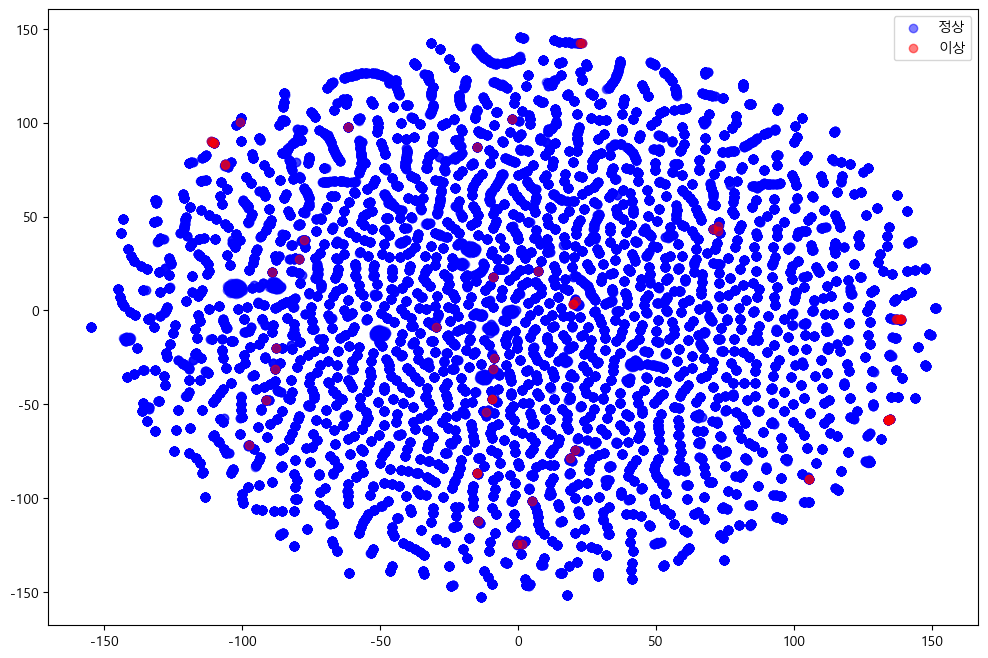

In [48]:
plt.figure(figsize=(12, 8))
plt.scatter(tsne_df_0['val0'], tsne_df_0['val1'], color = 'blue', label = '정상', alpha=0.5)
plt.scatter(tsne_df_1['val0'], tsne_df_1['val1'], color = 'red', label = '이상', alpha=0.5)
plt.legend()
plt.show()

In [40]:
df3['target'].value_counts()

target
정상    49999
이상       54
Name: count, dtype: int64

-----

In [13]:
tsne = TSNE(n_components=3, random_state=42)

df4 = df3.iloc[:, :-1]
X_t = tsne.fit_transform(df4)
tsne_df = pd.DataFrame(X_t, columns = ['val0', 'val1', 'val2'])

In [14]:
# class target 정보 불러오기
tsne_df['target'] = df3['target'].values

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == '정상']
tsne_df_1 = tsne_df[tsne_df['target'] == '이상']

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
for ax, data in zip(axs, [data1, data2]):
    ydata = "Y1" if ax == axs[0] else "Y2"
    
    data_pt = data.pivot_table("Z", ydata, "X")
    X_ = data_pt.columns.tolist()
    Y_ = data_pt.index.tolist()
    X = [X_ for _ in range(len(Y_))]
    Y = [[y_]*len(X_) for y_ in Y_]
    Z = data_pt.values
    
    ax.set_xlabel("X", fontdict=fontlabel, labelpad=16)
    ax.set_ylabel(ydata, fontdict=fontlabel, labelpad=16)
    ax.set_title("Z", fontdict=fontlabel)
    
    ax.plot_wireframe(X, Y, Z, cmap="inferno")   # ax.plot_wireframe()

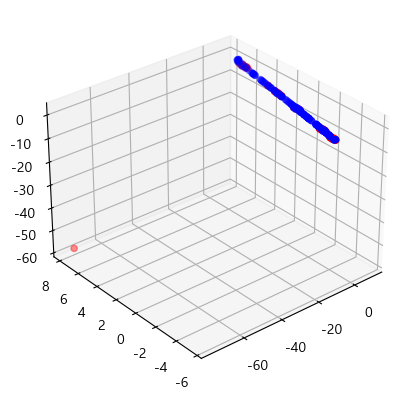

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df_0['val0'], tsne_df_0['val1'], tsne_df_0['val2'], c='blue')
ax.scatter(tsne_df_1['val0'], tsne_df_1['val1'], tsne_df_1['val2'], c = 'red')
ax.view_init(elev=30., azim=230)
plt.show()